In [8]:
#Check file reading issue
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import os

In [9]:
#file_name = "../nhussain_scripts/InvModShiftVals/10129857-10_feats.txt"
file_name = "../../Training/simulation/injection/injection.txt"
data  = np.loadtxt(file_name, dtype = str, delimiter=",")[:10000]#.reshape(data.shape[0], 5)
print data.shape
print data[0]
data = data.reshape((data.shape[0],5))
data = data[:, :-1]
#id, segment, depth, period
print data.shape
#concate the first two, create list of file names
values = np.core.defchararray.add(data[:,0], "-")
values = np.core.defchararray.add(values, data[:, 1])
data = data.astype("float64")#print data[0,:]
print type(data[1,3])
print values

(10000, 5)
['10000198' '0' '0.020139' '1.855512' '0.803056144.823149']
(10000, 4)
<type 'numpy.float64'>
['10000198-0' '10000198-1' '10000198-2' ..., '10385248-11' '10385248-12'
 '10385248-13']


1
7.7496299209 0.036647742096 0.000117368181959


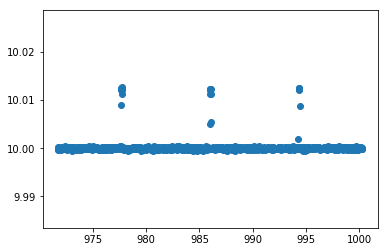

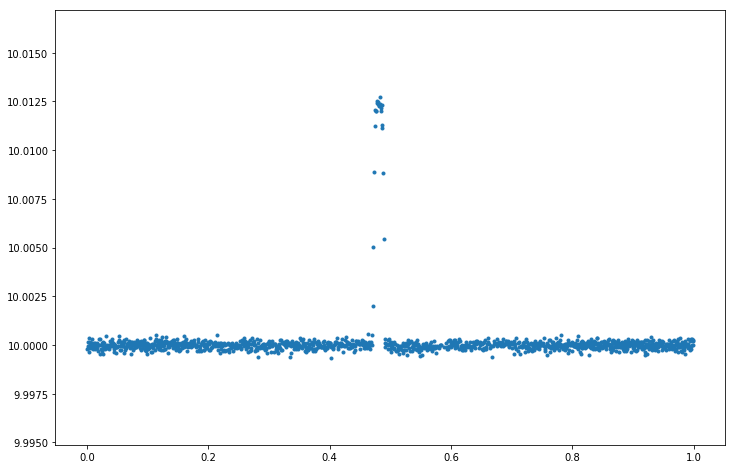

In [13]:
SNR = np.zeros(data.shape[0])
error = np.empty(data.shape[0])
#concatenate the first two values
for i, val in enumerate(values[9900:10000]):
    lc_data = np.loadtxt("../../Training/simulation/injection/"+val+"_inj.txt")
    bls_data = np.loadtxt("../../Training/simulation/injection/"+val+"_inj.blsanal")[0,:]
    transit_duration_phase = bls_data[7]
    period = bls_data[1]
    n_points_transit = transit_duration_phase*period *float(48)
    
    #print period, transit_duration, period* transit_duration, n_points_transit
    depth =float(data[i,2])**2 #depth
    meidan = np.median(lc_data[:,1]) # flux
    error = np.median(np.abs(lc_data[:,1]-meidan)**2)**0.5

    transits = float(26)//float(data[i,3]) +1

    SNR[i] = depth*np.sqrt(transits) * np.sqrt(n_points_transit)/(error*np.sqrt(2))
    #print SNR[i]
    if i %999 ==1:
        print i
    #break
    if SNR[i] >1000:
        plt.scatter(lc_data[:,0], lc_data[:,1])
        #print val
        #print bls_data
        
        plt.figure(figsize=(12,8))
        plt.scatter((lc_data[:, 0])/period %1, lc_data[:,1], marker=".")
        print n_points_transit, data[i, 2]**2, error
        break

9255


(array([  8.60800000e+03,   9.75000000e+02,   3.00000000e+02,
          8.00000000e+01,   2.30000000e+01,   5.00000000e+00,
          6.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00]),
 array([  6.06086030e-02,   6.63505839e+02,   1.32695107e+03,
          1.99039630e+03,   2.65384153e+03,   3.31728676e+03,
          3.98073199e+03,   4.64417722e+03,   5.30762245e+03,
          5.97106768e+03,   6.63451291e+03]),
 <a list of 10 Patch objects>)

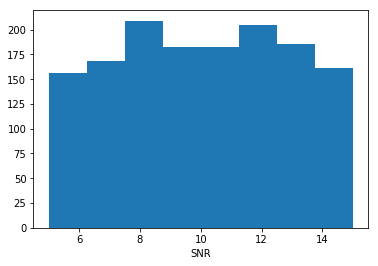

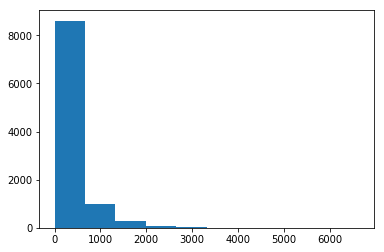

In [16]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
bins = np.linspace(5, 15, 9)
plt.hist(SNR[:10000], bins = bins)
print len(np.where(SNR[:10000]>=6)[0])
plt.xlabel("SNR")
fig = plt.figure()
plt.hist(SNR[:10000])


In [17]:
# save snr to file
np.savetxt("SNR_10000_corrected.txt", SNR)